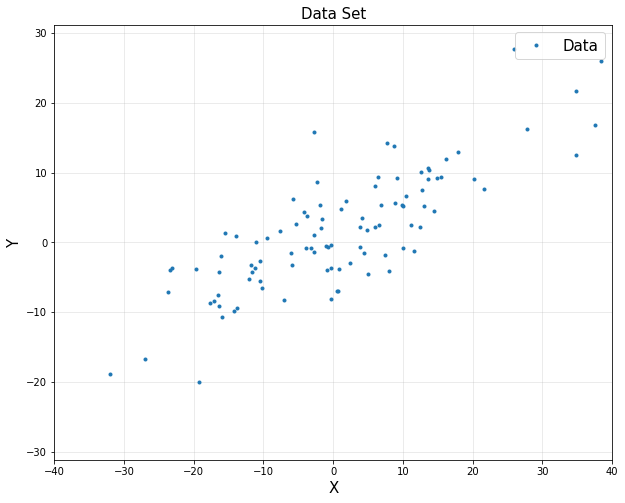

In [6]:
# KNN Regression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 100
w1 = 0.5
w0 = 2
x = np.random.normal(0, 15, N).reshape(-1,1)
y = w1*x + w0 + 5*np.random.normal(0, 1, N).reshape(-1,1)

plt.figure(figsize=(10,8))
plt.title("Data Set", fontsize=15)
plt.plot(x, y, '.', label = 'Data')
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.legend(fontsize = 15)
plt.axis('equal')
plt.axis([-40,40,-30,30])
plt.grid(alpha=0.3)
plt.show()

In [7]:
from sklearn import neighbors

reg = neighbors.KNeighborsRegressor(n_neighbors = 1)
reg.fit(x, y) # fit 학습시킨다는 뜻

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [8]:
x_new = np.array([[5]])
pred = reg.predict(x_new)[0,0]
print(pred)

-4.591219929745739


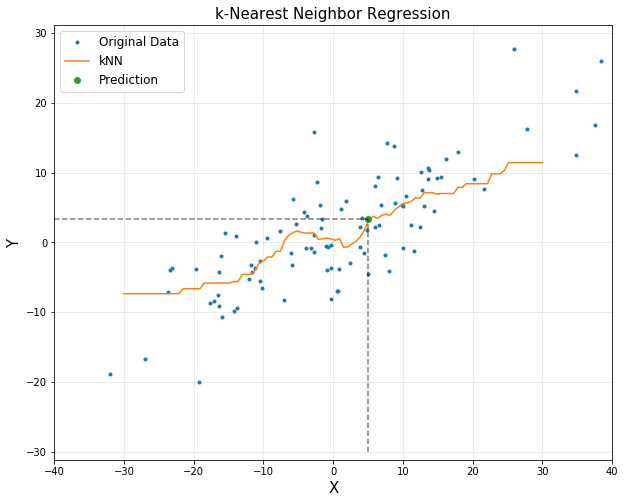

In [20]:
xp = np.linspace(-30, 30, 100).reshape(-1, 1)
yp = reg.predict(xp)

plt.figure(figsize = (10, 8))
plt.title('k-Nearest Neighbor Regression', fontsize = 15)
plt.plot(x, y, '.', label = 'Original Data')
plt.plot(xp, yp, label = 'kNN')
plt.plot(x_new, pred, 'o', label = 'Prediction')
plt.plot([x_new[0,0], x_new[0,0]], [-30, pred], 'k--', alpha = 0.5)
plt.plot([-40, x_new[0,0]], [pred, pred], 'k--', alpha = 0.5)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.legend(fontsize = 12, loc=0)
plt.axis('equal')
plt.axis([-40, 40, -30, 30])
plt.grid(alpha = 0.3)
plt.show()

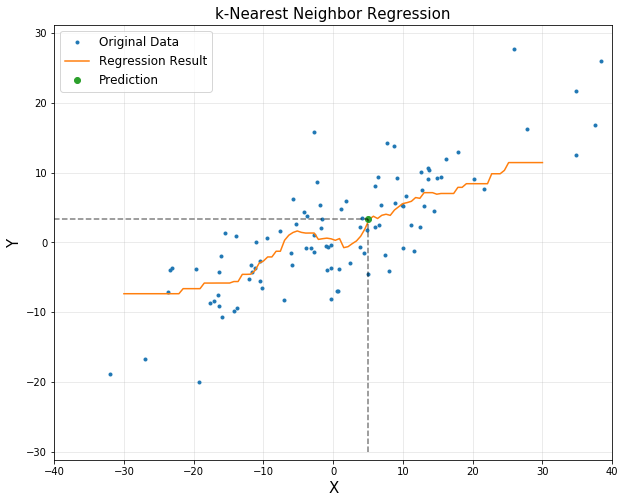

In [26]:
# Number of neighbors = 21
reg = neighbors.KNeighborsRegressor(n_neighbors = 21)
reg.fit(x, y)
x_new = np.array([[5]])
pred = reg.predict(x_new)[0,0] 

xp = np.linspace(-30, 30, 100).reshape(-1, 1)
yp = reg.predict(xp)

plt.figure(figsize = (10, 8))
plt.title('k-Nearest Neighbor Regression', fontsize=15)
plt.plot(x, y, '.', label='Original Data')
plt.plot(xp, yp, label = 'Regression Result')
plt.plot(x_new, pred, 'o', label = 'Prediction')
plt.plot([x_new[0,0], x_new[0,0]], [-30, pred], 'k--', alpha = 0.5)
plt.plot([-40, x_new[0,0]], [pred, pred], 'k--', alpha = 0.5)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.legend(fontsize = 12)
plt.axis('equal')
plt.axis([-40, 40, -30, 30])
plt.grid(alpha = 0.3)
plt.show()

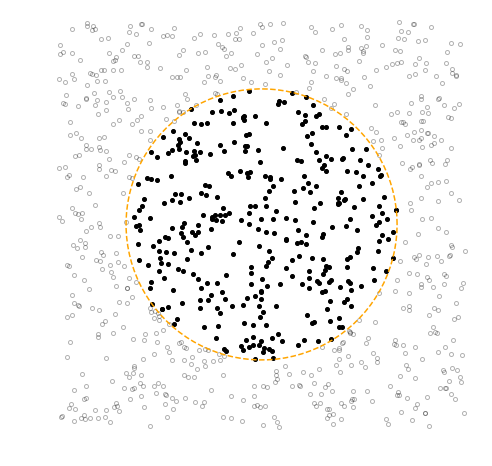

In [27]:
# KNN Classification

m = 1000
X = -1.5 + 3*np.random.uniform(size = (m,2))

y = np.zeros([m,1])
for i in range(m):
    if np.linalg.norm(X[i,:], 2) <= 1:
        y[i] = 1      

C1 = np.where(y == 1)[0]
C0 = np.where(y == 0)[0]

theta = np.linspace(0, 2*np.pi, 100)

plt.figure(figsize = (8,8))
plt.plot(X[C1,0], X[C1,1], 'o', label = 'C1', markerfacecolor = "k", markeredgecolor = 'k', markersize = 4)
plt.plot(X[C0,0], X[C0,1], 'o', label = 'C0', markerfacecolor = "None", alpha = 0.3, markeredgecolor = 'k', markersize = 4)
plt.plot(np.cos(theta), np.sin(theta), '--', color = 'orange')
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.axis('equal')
plt.axis('off')
plt.show()

In [40]:
X

array([[ 0.44287806,  1.00547156],
       [-1.28461797, -1.34717581],
       [-1.08036573,  0.32906159],
       ...,
       [-0.1164877 , -1.1243794 ],
       [-1.2876621 ,  0.42696757],
       [ 0.68843062,  0.39838662]])

In [28]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors = 1)
clf.fit(X, np.ravel(y))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [29]:
X_new = np.array([1, 1]).reshape(1,-1)
result = clf.predict(X_new)[0]
print(result)

0.0


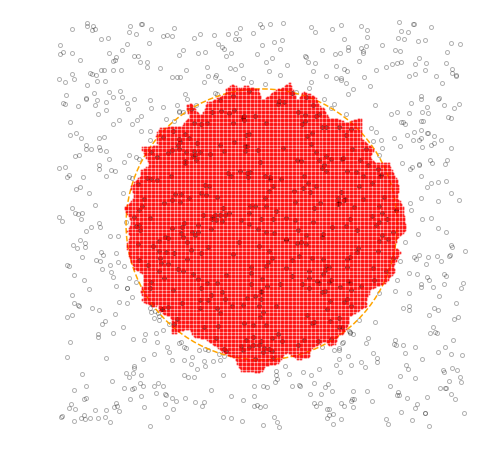

In [30]:
res = 0.01
[X1gr, X2gr] = np.meshgrid(np.arange(-1.5,1.5,res), np.arange(-1.5,1.5,res))

Xp = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])
Xp = np.asmatrix(Xp)

inC1 = clf.predict(Xp).reshape(-1,1)
inCircle = np.where(inC1 == 1)[0]

plt.figure(figsize = (8, 8))
plt.plot(X[C1,0], X[C1,1], 'o', label = 'C1', markerfacecolor = "k", alpha = 0.5, markeredgecolor = 'k', markersize = 4)
plt.plot(X[C0,0], X[C0,1], 'o', label = 'C0', markerfacecolor = "None", alpha = 0.3, markeredgecolor='k', markersize = 4)
plt.plot(np.cos(theta), np.sin(theta), '--', color = 'orange')
plt.plot(Xp[inCircle][:,0], Xp[inCircle][:,1], 's', alpha = 0.5, color = 'r', markersize = 1)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.axis('equal')
plt.axis('off')
plt.show()   

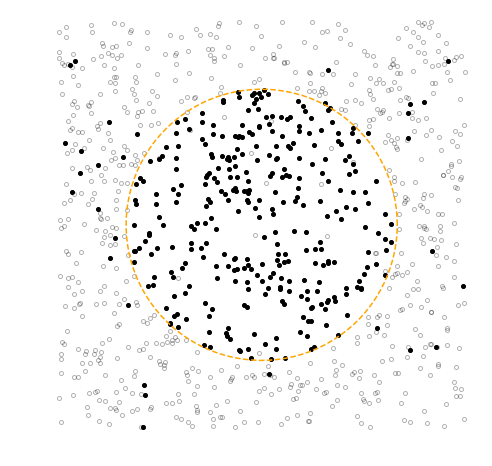

In [31]:
m = 1000
X = -1.5 + 3*np.random.uniform(size = (m,2))

y = np.zeros([m,1])
for i in range(m):
    if np.linalg.norm(X[i,:], 2) <= 1:
        if np.random.uniform() < 0.05:
            y[i] = 0
        else:
            y[i] = 1    
    else:
        if np.random.uniform() < 0.05:
            y[i] = 1
        else:
            y[i] = 0

C1 = np.where(y == 1)[0]
C0 = np.where(y == 0)[0]

theta = np.linspace(0, 2*np.pi, 100)

plt.figure(figsize = (8,8))
plt.plot(X[C1,0], X[C1,1], 'o', label = 'C1', markerfacecolor = "k", markeredgecolor = 'k', markersize = 4)
plt.plot(X[C0,0], X[C0,1], 'o', label = 'C0', markerfacecolor = "None", alpha = 0.3, markeredgecolor = 'k', markersize = 4)
plt.plot(np.cos(theta), np.sin(theta), '--', color = 'orange')
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.axis('equal')
plt.axis('off')
plt.show()

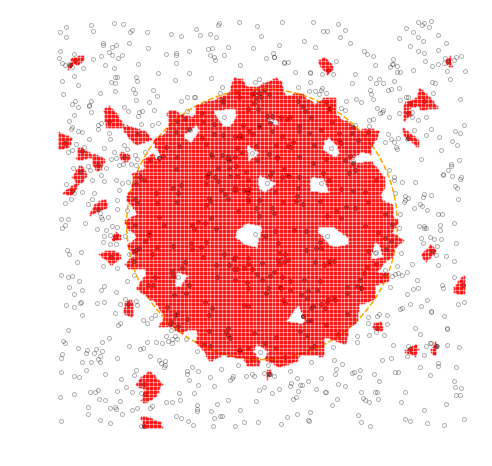

In [32]:
# k = 1
clf = neighbors.KNeighborsClassifier(n_neighbors = 1)
clf.fit(X, np.ravel(y))

res = 0.01
[X1gr, X2gr] = np.meshgrid(np.arange(-1.5,1.5,res), np.arange(-1.5,1.5,res))

Xp = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])
Xp = np.asmatrix(Xp)

inC1 = clf.predict(Xp).reshape(-1,1)
inCircle = np.where(inC1 == 1)[0]

plt.figure(figsize = (8, 8))
plt.plot(X[C1,0], X[C1,1], 'o', label = 'C1', markerfacecolor = "k", alpha = 0.5, markeredgecolor = 'k', markersize = 4)
plt.plot(X[C0,0], X[C0,1], 'o', label = 'C0', markerfacecolor = "None", alpha = 0.3, markeredgecolor='k', markersize = 4)
plt.plot(np.cos(theta), np.sin(theta), '--', color = 'orange')
plt.plot(Xp[inCircle][:,0], Xp[inCircle][:,1], 's', alpha = 0.5, color = 'r', markersize = 1)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.axis('equal')
plt.axis('off')
plt.show()   

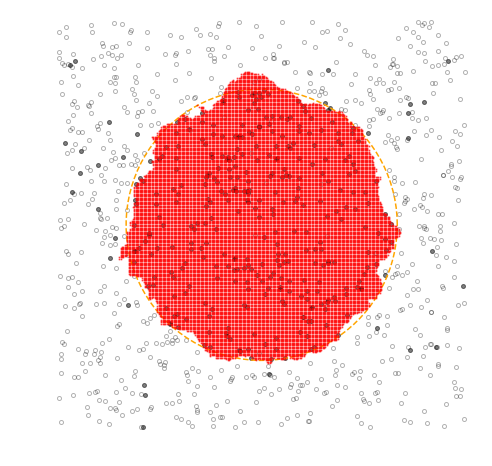

In [42]:
"Number of neighbor = 11"
clf = neighbors.KNeighborsClassifier(n_neighbors = 11)
clf.fit(X, np.ravel(y))

res = 0.01
[X1gr, X2gr] = np.meshgrid(np.arange(-1.5,1.5,res), np.arange(-1.5,1.5,res))

Xp = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])
Xp = np.asmatrix(Xp)

inC1 = clf.predict(Xp).reshape(-1,1)
inCircle = np.where(inC1 == 1)[0]

plt.figure(figsize = (8, 8))
plt.plot(X[C1,0], X[C1,1], 'o', label = 'C1', markerfacecolor = "k", alpha = 0.5, markeredgecolor = 'k', markersize = 4)
plt.plot(X[C0,0], X[C0,1], 'o', label = 'C0', markerfacecolor = "None", alpha = 0.3, markeredgecolor='k', markersize = 4)
plt.plot(np.cos(theta), np.sin(theta), '--', color = 'orange')
plt.plot(Xp[inCircle][:,0], Xp[inCircle][:,1], 's', alpha = 0.5, color = 'r', markersize = 1)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.axis('equal')
plt.axis('off')
plt.show()